# Chapter 11. Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

## 時系列データのパース

In [2]:
from datetime import datetime
from dateutil.parser import parse

# フォーマットが固定されているとき
datestrs = ['7/6/2011', '8/6/2011']
dates=[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]    

dates

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [3]:
# フォーマットが固定されてないとき

datestrs=['2011-01-03','Jan 31, 1997 10:45 PM']

# よしなに判断してくれる
dates=[parse(x) for x in datestrs]

dates

[datetime.datetime(2011, 1, 3, 0, 0), datetime.datetime(1997, 1, 31, 22, 45)]

## index

In [4]:
# dateをindexに指定
ts_se=pd.Series(np.random.randn(100),
                index=pd.date_range('1/1/2001',periods=100))

ts_se[datetime(2001,1,1)]

# strでも取得可能
ts_se['2001/1/1']

# 月単位で取得
ts_se['2001-01']

2001-01-01    0.778944
2001-01-02    0.281381
2001-01-03    0.887139
2001-01-04   -0.057378
2001-01-05   -0.369825
2001-01-06   -0.436644
2001-01-07   -1.645300
2001-01-08    0.154793
2001-01-09    0.197276
2001-01-10   -0.976181
2001-01-11   -1.817456
2001-01-12   -2.303510
2001-01-13   -0.188202
2001-01-14   -1.351404
2001-01-15    0.091877
2001-01-16    0.419586
2001-01-17   -0.377346
2001-01-18   -1.265673
2001-01-19   -0.431942
2001-01-20   -1.632845
2001-01-21    0.726844
2001-01-22    0.429632
2001-01-23    0.244325
2001-01-24    0.479007
2001-01-25    0.593421
2001-01-26    0.187052
2001-01-27    1.139184
2001-01-28    0.148014
2001-01-29   -3.441665
2001-01-30   -0.206502
2001-01-31   -0.477175
Freq: D, dtype: float64

In [5]:
# 特定の日付以降を取得
ts_se[datetime(2001,4,10):]
ts_se['2001-4-10':]

2001-04-10   -0.46601
Freq: D, dtype: float64

## freqの指定

In [6]:
# 月の第三週の金曜日
rng=pd.date_range('2001/1/1','2001/5/5',freq='WOM-3FRI')
list(rng)

[Timestamp('2001-01-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-02-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2001-04-20 00:00:00', freq='WOM-3FRI')]

In [7]:
# date indexのshift
ds=pd.Series(np.random.rand(10)
             ,index=pd.date_range('2001/1/1',periods=10))

ds

2001-01-01    0.759780
2001-01-02    0.095663
2001-01-03    0.868078
2001-01-04    0.316771
2001-01-05    0.480936
2001-01-06    0.650419
2001-01-07    0.457282
2001-01-08    0.056660
2001-01-09    0.041925
2001-01-10    0.262577
Freq: D, dtype: float64

In [8]:
ds.shift(10,'D')

2001-01-11    0.759780
2001-01-12    0.095663
2001-01-13    0.868078
2001-01-14    0.316771
2001-01-15    0.480936
2001-01-16    0.650419
2001-01-17    0.457282
2001-01-18    0.056660
2001-01-19    0.041925
2001-01-20    0.262577
Freq: D, dtype: float64

In [9]:
# freqを指定しないと、値のほうがずれる
ds.shift(3)

2001-01-01         NaN
2001-01-02         NaN
2001-01-03         NaN
2001-01-04    0.759780
2001-01-05    0.095663
2001-01-06    0.868078
2001-01-07    0.316771
2001-01-08    0.480936
2001-01-09    0.650419
2001-01-10    0.457282
Freq: D, dtype: float64

In [10]:
# offsetでdateを変換
from pandas.tseries.offsets import Day,MonthEnd

now=datetime.now()

now+3*Day()

Timestamp('2018-05-31 17:13:24.498219')

In [11]:
now+MonthEnd()

Timestamp('2018-05-31 17:13:24.498219')

In [12]:
now-MonthEnd()

Timestamp('2018-04-30 17:13:24.498219')

## resampling

In [18]:
# 5minごとのデータ
rng=pd.date_range("2001/1/1",periods=12,freq='T')

data=pd.Series(np.arange(12),index=rng)

data

2001-01-01 00:00:00     0
2001-01-01 00:01:00     1
2001-01-01 00:02:00     2
2001-01-01 00:03:00     3
2001-01-01 00:04:00     4
2001-01-01 00:05:00     5
2001-01-01 00:06:00     6
2001-01-01 00:07:00     7
2001-01-01 00:08:00     8
2001-01-01 00:09:00     9
2001-01-01 00:10:00    10
2001-01-01 00:11:00    11
Freq: T, dtype: int64

In [19]:
# 5分ごとに集計
data.resample('5min',closed='left').sum()

2001-01-01 00:00:00    10
2001-01-01 00:05:00    35
2001-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [21]:
data.resample('5min',closed='right').sum()

2000-12-31 23:55:00     0
2001-01-01 00:00:00    15
2001-01-01 00:05:00    40
2001-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [23]:
data.resample('5min',closed='right',label='right').sum()

2001-01-01 00:00:00     0
2001-01-01 00:05:00    15
2001-01-01 00:10:00    40
2001-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [24]:
data.resample('5min',closed='right',label='right',loffset='-1s').sum()

2000-12-31 23:59:59     0
2001-01-01 00:04:59    15
2001-01-01 00:09:59    40
2001-01-01 00:14:59    11
Freq: 5T, dtype: int64

## 欠損データを埋める

In [27]:
 frame = pd.DataFrame(np.random.randn(2, 4),
     index=pd.date_range('1/1/2000', periods=2,
     freq='W-WED'),
    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.369470,1.372299,-1.259502,-2.688946
2000-01-12,-0.505105,0.637409,0.993421,0.050119


In [29]:
frame.resample('D').asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,0.369470,1.372299,-1.259502,-2.688946
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.505105,0.637409,0.993421,0.050119


In [31]:
frame.resample('D').asfreq().ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.369470,1.372299,-1.259502,-2.688946
2000-01-06,0.369470,1.372299,-1.259502,-2.688946
2000-01-07,0.369470,1.372299,-1.259502,-2.688946
2000-01-08,0.369470,1.372299,-1.259502,-2.688946
2000-01-09,0.369470,1.372299,-1.259502,-2.688946
2000-01-10,0.369470,1.372299,-1.259502,-2.688946
2000-01-11,0.369470,1.372299,-1.259502,-2.688946
2000-01-12,-0.505105,0.637409,0.993421,0.050119


## Moving Window Function

In [35]:
close_px_all=pd.read_csv('./dataset/pydata-book/examples/stock_px_2.csv',parse_dates=True,index_col=0)

close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [43]:
# 営業日で集計
close_px=close_px_all.drop(['SPX'],axis=1).resample('B').ffill()

close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


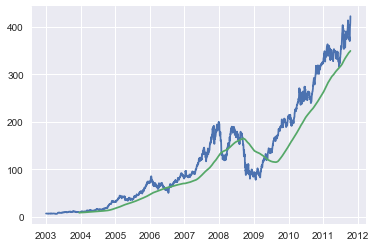

In [48]:
# 250日ごとの移動平均
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [51]:
app_250_std=close_px.AAPL.rolling(250,min_periods=10).std()

# 10番目から移動平均が出る
app_250_std.head(15)

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
2003-01-20    0.132011
2003-01-21    0.149286
2003-01-22    0.169008
Freq: B, Name: AAPL, dtype: float64

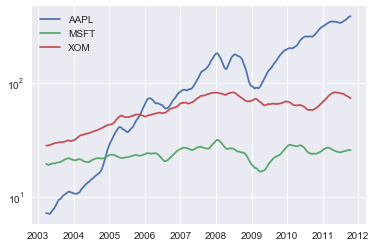

In [57]:
close_px.rolling(60).mean().plot(logy=True)

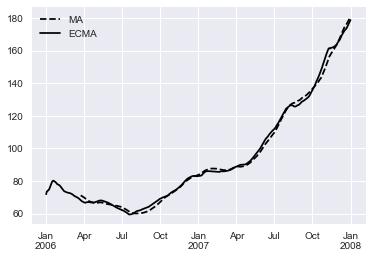

In [65]:
app_px=close_px.AAPL['2006':'2007']

# 最新の値に重みをつけた移動平均
ecma60=app_px.ewm(span=60).mean()

ma60=app_px.rolling(60).mean()

ma60.plot(style='k--',label='MA')
ecma60.plot(style='k-',label='ECMA')

plt.legend()

### 別の統計データとの相関

In [71]:
spx_px=close_px_all.SPX

# 一つ前との変化率
spx_rets=spx_px.pct_change()
returns=close_px_all.pct_change()

returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


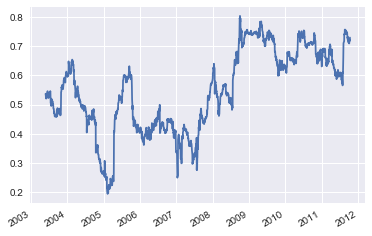

In [76]:
# AAPLとSPXの変化との相関係数b
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

corr.plot()

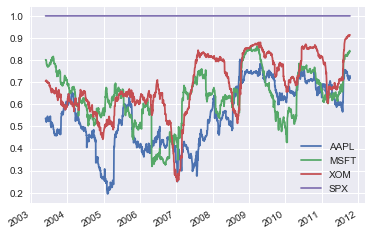

In [78]:
returns.rolling(125,min_periods=100).corr(spx_rets).plot()

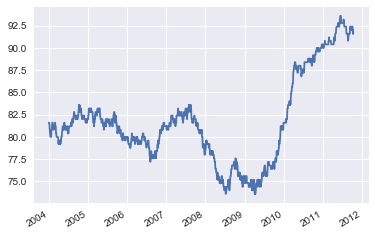

In [80]:
# applyで任意の関数を適用
from scipy.stats import percentileofscore

returns.AAPL.rolling(250).apply(lambda x:percentileofscore(x,0.02)).plot()